# 💸Billionaire Booms: A Country-Wise Analysis
---
In the realm of global economics, the prevalence of billionaires becomes a captivating lens through which we can explore a fundamental question: Why do certain countries harbor a greater number of billionaires than others? This data science project delves into a rich dataset encompassing population dynamics, Consumer Price Index (CPI) changes, tax revenue, and more, seeking to unravel the nuanced factors that contribute to the concentration of extreme wealth in specific nations.

Beyond the numerical exploration lies a qualitative journey into the economic and policy landscapes that shape the billionaire phenomenon. By examining the intricate interplay between demographic structures, economic indicators, and government policies, we aim to provide insights that transcend statistical trends. Our pursuit is not only to discern "what" drives higher billionaire counts but, more importantly, to understand the "why" behind the disparities in extreme wealth across diverse countries.

Join us in this analytical endeavor as we navigate the data-driven terrain, aiming to shed light on the complex dynamics that define why certain countries stand out with a higher prevalence of billionaires.<sup>1</sup>

## ⏳ Dataset
---
* Download the dataset and make sure it's in the same repository as the ipynb file
* https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset


## ⚙️ Setup for additional packages
---
1. Install seaborn :-

```py 
pip install seaborn
```

2. Install plotly :-

```py
pip install plotly
```

## 🧑🏾‍💻 Contributors
---
* Jonathan McKesey (100863402)

## 📗 Process
---

### Step 1: 🔃 Data Loading & Module import Imports


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importing data
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data.head(n=10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


### Step 2: 🧹 Data Wrangling

In [27]:
# Ommiting any columns that won't be relevant to the project

data = data[[#'rank', 'finalWorth', 'category', 'personName', 
      'age', 'country','city', 
      #'source', 
      'industries', 
      # 'countryOfCitizenship', 'organization', 
      'selfMade', 
      #'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'residenceStateRegion', 'birthYear','birthMonth', 'birthDay', 
      'cpi_country', 'cpi_change_country', 'gdp_country', 'gross_tertiary_education_enrollment', 'gross_primary_education_enrollment_country', 
      #'life_expectancy_country',
      'tax_revenue_country_country', 'total_tax_rate_country','population_country', 'latitude_country', 'longitude_country'
      ]]

# Dropping dupes
data = data.drop_duplicates()

# Replace True/False to 1 & 0 in the 'selfMade' column to make data easier to work with
data = data.replace({'selfMade': {True:1, False:0}})

### Step 3: 📊 Data Manipulation & plots

In [28]:
# Descriptive statistics
data[['age', 'cpi_country', 'selfMade', 'tax_revenue_country_country', 'gross_primary_education_enrollment_country']].describe()

,age,cpi_country,selfMade,tax_revenue_country_country,gross_primary_education_enrollment_country
count,2448.000000,2329.000000,2500.000000,2330.000000,2332.000000
mean,65.363154,127.536668,0.680000,12.622575,102.848199
std,13.353852,26.534453,0.466569,5.426491,4.715135
min,18.000000,99.550000,0.000000,0.100000,84.700000
25%,56.000000,116.760000,0.000000,9.600000,100.200000
50%,65.000000,117.240000,1.000000,9.600000,101.800000
75%,75.000000,125.080000,1.000000,13.100000,102.600000
max,101.000000,288.570000,1.000000,37.200000,142.100000


In [29]:
# Show how many billionaires per country
country_counts = data['country'].value_counts()
count_df = pd.DataFrame(country_counts.items(), columns=['country', 'count'])

count_df

,country,count
0,United States,712
1,China,481
2,India,140
3,Germany,98
4,United Kingdom,79
...,...,...
73,Portugal,1
74,Georgia,1
75,Eswatini (Swaziland),1
76,Uzbekistan,1


In [30]:
# Chropleth plot showing the density of billionaires per country
# Reference 2

fig = px.choropleth(count_df,
                    locations='country',
                    locationmode='country names',
                    color='count',
                    color_continuous_scale="algae",
                    title='Billionaires per country',
                    labels={'billionaires': 'billionaires'},
                    width=700)

fig.show()

In [31]:
# We can see there's a high concentration of billionaires in United States, China, India & Germany
# Reference 3
def categorize_country(country):
    if country in ['United States', 'China', 'India', 'Germany']:
        return 'US, CN, IND, GER'
    else:
        return 'Other countries'

data['group'] = data['country'].apply(categorize_country)

# Make a new columns called 'count' that shows how many billionaires are in each group
data['count'] = data.groupby('group')['group'].transform('count')


grouped = data.groupby('group')
mean_values = grouped.mean()

mean_values

,age,selfMade,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country,count
group,,,,,,,,,,,,
Other countries,66.356256,0.605239,130.371537,2.386748,65.656000,103.387569,17.084538,39.816333,6.534511e+07,33.076975,36.800544,1069.0
"US, CN, IND, GER",64.620985,0.735849,125.757694,5.555625,68.449057,102.508595,9.819427,46.313627,7.725038e+08,36.027298,-4.158309,1431.0


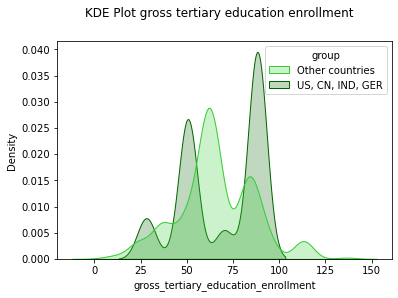

In [32]:
# Kernel Density Plot of 'gross tertiary education enrollment'

custom_palette = {'US, CN, IND, GER': 'darkgreen', 'Other countries': 'limegreen'}

sns.kdeplot(data=data, x='gross_tertiary_education_enrollment', hue='group', common_norm=False, palette=custom_palette, shade=True)
plt.suptitle('KDE Plot gross tertiary education enrollment', y=1)
plt.show()

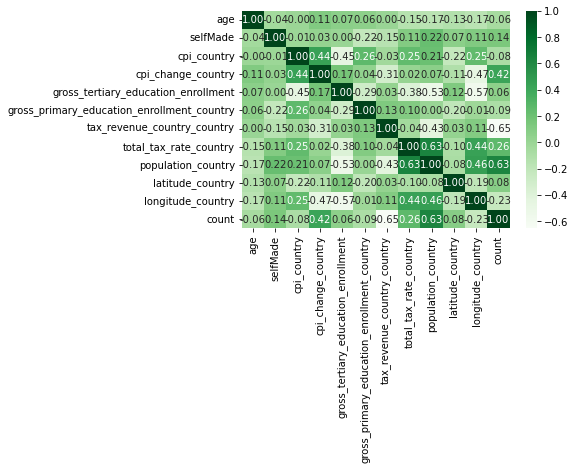

In [33]:
# Correlation Analysis via heatmap
# Used pearsons correlation
correlation = data.corr(method='pearson')

sns.heatmap(correlation, annot=True, cmap='Greens', fmt=".2f")
plt.show()

### 👨🏾‍🔬Analysis
---

* In the heatmap, we can see that the billionaire count of the countries is positively correlated with the population. Further, upon looking at the mean population of the countries, we could see that the US, CN, IND, and GER, on average, had a 10x higher population than the rest of the countries. This finding may indicate that larger populations are associated with a higher billionaire count. This could be due to larger markets and more business opportunities.

* The heat map also shows a strong positive correlation between the cpi change of a country and its billionaire count. This implies that periods of economic growth are conducive to wealth accumulation, thus the emergence of more billionaires.


* My final finding in the heatmap is the strong negative correlation between the tax revenue of a country and its billionaire count. This correlation suggests that higher tax revenue reduces income. As a result, this can lead to less extreme wealth accumulation. This finding is further reinforced by the fact that, in cell 24, the top 4 countries in terms of billionaire count have nearly 50% less tax revenue compared to the rest of the countries on average, which explains the polarity of the billionaire counts.


* Another interesting finding is that if you direct your attention to cell 25, we can see that the four countries with the majority of the world's billionaires have a higher density of the population that has attended tertiary education (post-graduate institutions). This may indicate that a more educated population can lead to a higher billionaire count in the underlying countries.

* One last observation is that the US, CN, IND, and GER have nearly 25% more self-made billionaires (cell 16). According to my graphs, the emergence of new self-made billionaires can be partly due to the factors mentioned previously.

### 📖 References        

* For the project layout and format I consulted: youtube: https://www.youtube.com/watch?v=QAVrSm-NiBo

* Consulted Lectures 14-21 of the Scientific Data Analysis Lectures offered at Ontario Tech University 2023.

* Consulted Lecture 15 of the Statistics and Probability for Physical Science offered at Ontario Tech University 2023 (for pearson correlation).

